In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.ndimage.interpolation import shift

# problem1

E[X[n]] = 0.5n

Var[X[n]] = 0.75n

when n goes to infinity, X[n] goes to infinity

when p is greater than 0.5, even it is slightly greater, you will finally get positive X. On the other hand, if p is smaller than 0.5, you will finally get nagative X.

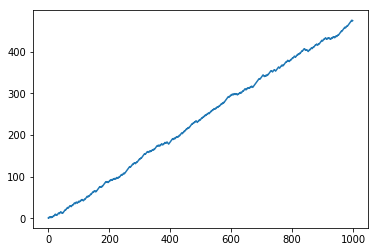

In [3]:
n = 1000
p = 0.75
U = np.random.binomial(1,p,n)
U[U == 0] = -1
X = np.cumsum(U)
plt.plot(X)

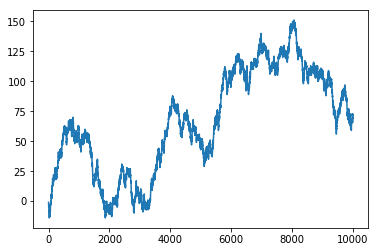

In [4]:
n = 10000
p = 0.5
U = np.random.binomial(1,p,n)
U[U == 0] = -1
X = np.cumsum(U)
plt.plot(X)

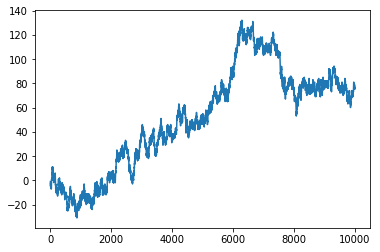

In [5]:
n = 10000
p = 0.501
U = np.random.binomial(1,p,n)
U[U == 0] = -1
X = np.cumsum(U)
plt.plot(X)

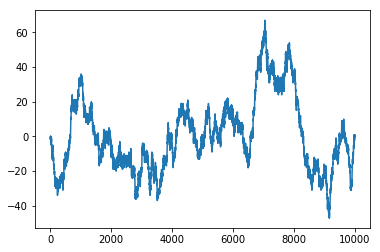

In [6]:
n = 10000
p = 0.499
U = np.random.binomial(1,p,n)
U[U == 0] = -1
X = np.cumsum(U)
plt.plot(X)

# problem2

In [7]:
sigmaU2 = 1
a = 0.95
X1 = np.zeros([10000,51])
X2 = np.zeros([10000,51])
X2[:,0] = np.random.normal(loc = 0, scale = math.sqrt(sigmaU2/(1-a*a)), size = [10000] )
for i in range(1,51):
    U = np.random.normal(loc = 0, scale = math.sqrt(sigmaU2), size = [10000] ) 
    X1[:,i] = a * X1[:,i-1] + U
    X2[:,i] = a * X2[:,i-1] + U
    
estimated_variance1 = np.power(X1[:,1:50],2).mean()
estimated_variance2 = np.power(X2[:,1:50],2).mean()
print("first realization: theoretical result is %f, the estimated result is %f" %(sigmaU2/(1-a*a), estimated_variance1))
print("second realization: the theoretical result is %f, the estimated result is %f" %(sigmaU2/(1-a*a), estimated_variance2))

first realization: theoretical result is 10.256410, the estimated result is 8.308747
second realization: the theoretical result is 10.256410, the estimated result is 10.175378


## we can get in the second way but cannot get in the first way

# problem3

(array([1.13734189e+01, 2.06534728e+01, 1.56623473e+01, 1.04464206e+01,
        6.69670098e+00, 4.24459615e+00, 2.83529623e+00, 3.03830062e+00,
        3.96488920e+00, 3.35881483e+00, 1.34257412e+00, 1.42771948e-01,
        4.24754382e-01, 1.22319395e+00, 1.87286014e+00, 2.24842434e+00,
        2.31143606e+00, 1.94081316e+00, 1.33665020e+00, 1.16068608e+00,
        1.40949921e+00, 1.25318015e+00, 6.63357547e-01, 5.47337393e-01,
        9.62312353e-01, 9.49062827e-01, 4.00834836e-01, 3.39976851e-01,
        9.60250735e-01, 1.28770154e+00, 1.08487841e+00, 1.08522814e+00,
        1.33935870e+00, 1.20914147e+00, 7.05527394e-01, 3.88387189e-01,
        4.24564874e-01, 6.18893552e-01, 8.44262863e-01, 1.01521879e+00,
        1.00205202e+00, 7.39600821e-01, 3.45250511e-01, 6.76420014e-02,
        2.63829074e-02, 9.57061913e-02, 1.27455420e-01, 1.11450316e-01,
        8.44844366e-02, 5.03731038e-02, 1.10125344e-02, 1.69971101e-02,
        1.24184305e-01, 2.56037520e-01, 2.77100250e-01, 2.588976

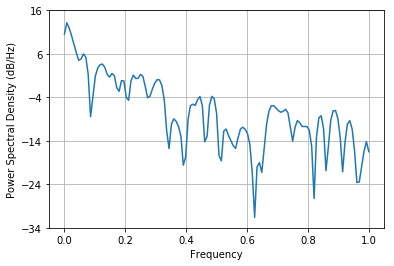

In [8]:
n = 100
sigmaU2 = 1
a = 0.9
b = 0.2
X = np.zeros(n)
X[0] = np.random.normal(loc = 0, scale = math.sqrt(sigmaU2*(1+(a+b)*(a+b)/(1-a*a))))
U = np.random.normal(loc = 0, scale = math.sqrt(sigmaU2), size = n+1 ) 
#X[0] = np.random.normal(loc = 0, scale = math.sqrt(math.sqrt(sigmaU2/(1-a*a))), size = [10000] )
for i in range(1,100):
    X[i] = a * X[i-1] + U[i] - b * U[i-1]
plt.psd(X)

(array([2.01226032e-02, 4.40847237e-02, 5.18557602e-02, 5.22367421e-02,
        4.53460135e-02, 5.03840593e-02, 6.32291349e-02, 5.19476610e-02,
        1.95988637e-02, 4.36271439e-03, 8.86728845e-03, 7.20838416e-03,
        6.63171961e-03, 2.07043256e-02, 2.48832742e-02, 7.69807992e-03,
        1.74343204e-03, 2.47480508e-02, 5.08193642e-02, 6.14927568e-02,
        8.89247666e-02, 1.57377988e-01, 2.00130388e-01, 1.47762373e-01,
        6.15638340e-02, 3.35576176e-02, 5.11672373e-02, 7.51177335e-02,
        9.90401494e-02, 9.82250957e-02, 6.82290325e-02, 4.72913228e-02,
        2.72854078e-02, 3.07244327e-04, 4.31947455e-02, 1.60471828e-01,
        2.30569456e-01, 2.43536997e-01, 2.87531789e-01, 3.04333638e-01,
        2.10371925e-01, 1.04649963e-01, 7.21101189e-02, 4.75419761e-02,
        1.57419117e-02, 4.48795769e-02, 1.09824086e-01, 1.13816179e-01,
        4.42557857e-02, 3.82340306e-02, 2.86191561e-01, 7.33443185e-01,
        9.79308971e-01, 7.52452192e-01, 3.15743004e-01, 1.154998

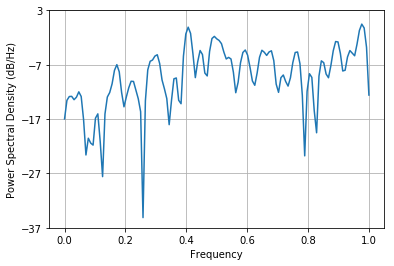

In [9]:
n = 100
sigmaU2 = 1
a = 0.2
b = 0.9
X = np.zeros(n)
X[0] = np.random.normal(loc = 0, scale = math.sqrt(sigmaU2*(1+(a+b)*(a+b)/(1-a*a))))
U = np.random.normal(loc = 0, scale = math.sqrt(sigmaU2), size = n+1 ) 
#X[0] = np.random.normal(loc = 0, scale = math.sqrt(math.sqrt(sigmaU2/(1-a*a))), size = [10000] )
for i in range(1,100):
    X[i] = a * X[i-1] + U[i] - b * U[i-1]
plt.psd(X)

## it can be showed that the first graph has more power in low frequency while the second graph has more power in high frequency. The is because the second data set(a = 0.2, b=0.9) are more fluctuated. And the PSD represents this rate of change of data

# problem 4

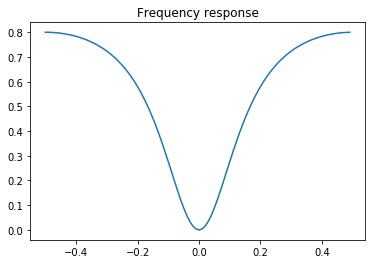

In [10]:
accuracy = 0.01
f = np.arange(-0.5,0.5,accuracy)
P = 2-2*np.cos(2*math.pi*f)
H = P/(1+P)
plt.title("Frequency response")
plt.plot(f,H)

In [11]:
rou = P / 1
mse = (P/(1+P)*accuracy).sum()
print("the MSE is ", mse)

the MSE is  0.5527864045000423


# problem5

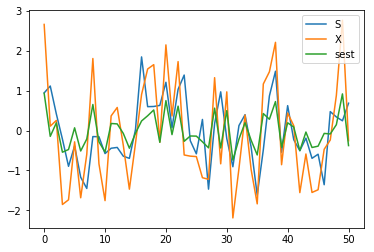

In [12]:
sigmaU2 = 0.5
sigmaW2 = 1
a = 0.25
S = np.zeros(51)
S[0] =  np.random.normal(loc = 0, scale = math.sqrt(sigmaU2/(1-a*a)) ) 
for i in range(1,51):
    S[i] = a * S[i-1] + np.random.normal(loc = 0, scale = math.sqrt(sigmaU2) )
X = S + np.random.normal(loc = 0, scale = math.sqrt(sigmaW2), size = 51)

f = np.linspace(-0.5,0.5,51)
P = sigmaU2 / np.power(np.abs(1-a*np.exp(-1j*2*math.pi*f)),2)
H = P/(sigmaW2+P)
sestf = H * np.fft.fft(X)
sest = np.fft.ifft(sestf).real


plt.plot(S, label = "S")
plt.plot(X, label = "X")
plt.plot(sest, label="sest")
plt.legend()

# problem6

## H(n) = U(n) - U(n-1)

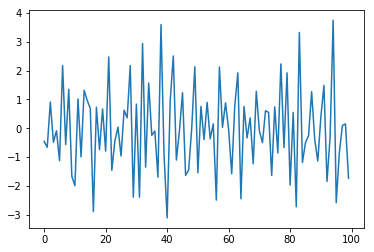

In [13]:
n = 100
sigmaU2 = 1
U = np.random.normal(loc = 0, scale = math.sqrt(sigmaU2), size = n+1)
X = np.zeros(n)
for i in range(100):
    X[i] = U[i+1] - U[i]
plt.plot(X)

In [14]:
print("Theoretical: ", "[2,-1,0,0,0,0,0,0,0,0]")
print("Simulation: ")
for i in range(10):
    X = pd.DataFrame(X)
    Acs = ( X * X.shift(periods = i) ).mean().values[0]
    print("Acs(%d) = %f" %(i,Acs))

Theoretical:  [2,-1,0,0,0,0,0,0,0,0]
Simulation: 
Acs(0) = 2.216072
Acs(1) = -1.068740
Acs(2) = 0.055945
Acs(3) = -0.376640
Acs(4) = 0.725303
Acs(5) = -0.935933
Acs(6) = 0.564826
Acs(7) = 0.075290
Acs(8) = 0.069004
Acs(9) = -0.366933


# problem7

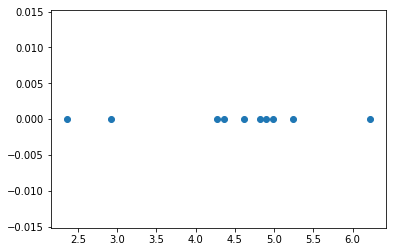

In [15]:
lamda = 2
n = 10
T = np.random.exponential(1/lamda, n)
X = np.cumsum(T)
y = np.zeros(n)
plt.scatter(X,y)

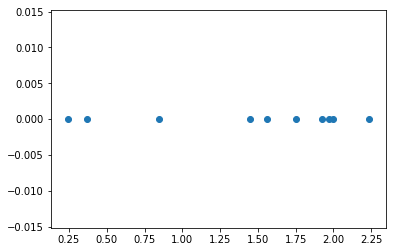

In [16]:
lamda = 5
n = 10
T = np.random.exponential(1/lamda, n)
X = np.cumsum(T)
y = np.zeros(n)
plt.scatter(X,y)

# problem8

In [17]:
lamda = 1
n = 1000
T2 = np.random.exponential(1/lamda,[n,2]).sum(axis = 1)
print("P(T2<=1) = ", T2[T2<=1].size/n)
print("Theoretical: ", 1-np.exp(-lamda)-np.exp(-lamda))

P(T2<=1) =  0.284
Theoretical:  0.26424111765711533


# problem9

In [18]:
n = 10000
count = 0
p = 0.1
for i in range(n):
    if(np.random.binomial(1,p,5).sum() % 2 == 1):
        count = count+1
print("the probability of error is ",count/n)

the probability of error is  0.3328


# problem10

## I am not so sure about what the state represent. So i assume it represent the number of still-on light that the custodian see each day (but before he repair)

In [19]:
p = 0.5
lightbulb = np.array([1,1,1])
old = 3
TPM = np.zeros([4,4])
for _ in range(10000):
    for i in range(3):
        if(lightbulb[i] > 0):
            lightbulb[i] -= np.random.binomial(1,p)
    new = lightbulb.sum()    
    TPM[old, new] += 1
    old = new
    if(new == 0):
        lightbulb = np.array([1,1,1])
TPM/TPM.sum(axis = 0).reshape(4,1)
        

array([[0.12817259, 0.35913706, 0.38991117, 0.12277919],
       [0.49300466, 0.50677326, 0.        , 0.        ],
       [0.24356955, 0.49343832, 0.26299213, 0.        ],
       [0.14545455, 0.33863636, 0.39772727, 0.12045455]])